Importing the necessary modules

In [1]:
from IPython.display import display
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

Creating 2 qubits for superdense coding protocol,
<br>
2 classical bits(a,b) as input,
<br>
2 classical bits(c,d) as output,
<br>
1 qubit that assigns the states to input classical bits.

In [2]:
a, b = ClassicalRegister(1), ClassicalRegister(1)
e_0, e_1 = QuantumRegister(1), QuantumRegister(1)
c, d = ClassicalRegister(1), ClassicalRegister(1)
assign_bit = QuantumRegister(1)

qc = QuantumCircuit(assign_bit, b, a, e_0, e_1, c, d)

Initializing 2 qubits as the Phi+ Bell State

In [3]:
qc.h(e_0)
qc.cx(e_0, e_1)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q3'), 0), Qubit(QuantumRegister(1, 'q1'), 0), Qubit(QuantumRegister(1, 'q2'), 0)), clbits=())

Adding gates to create Superdense Coding protocol

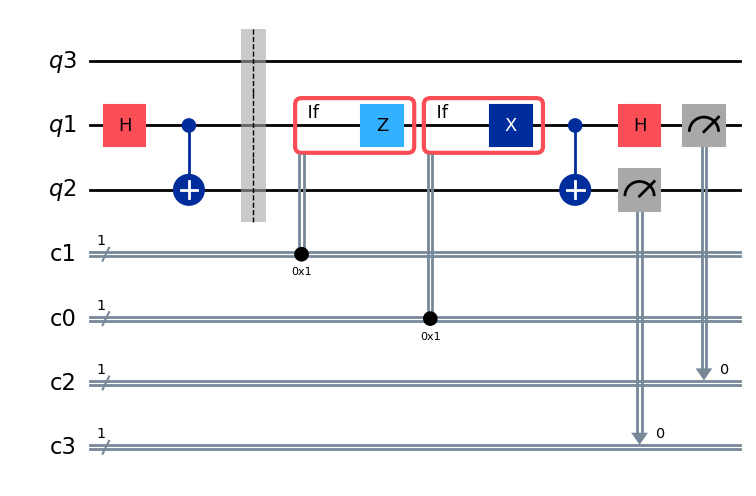

In [4]:
with qc.if_test((b, 1)):
    qc.z(e_0)
with qc.if_test((a, 1)):
    qc.x(e_0)

qc.cx(e_0, e_1)
qc.h(e_0)

qc.measure(e_0, c)
qc.measure(e_1, d)

display(qc.draw('mpl'))

Testing the quantum circuit with the states |00>, |01>, |10>, |11>
<br>
RBG(Random Bit Generator) is defined as a qubit that randomly assigns states |0> & |1> to the input classical bits (a,b).

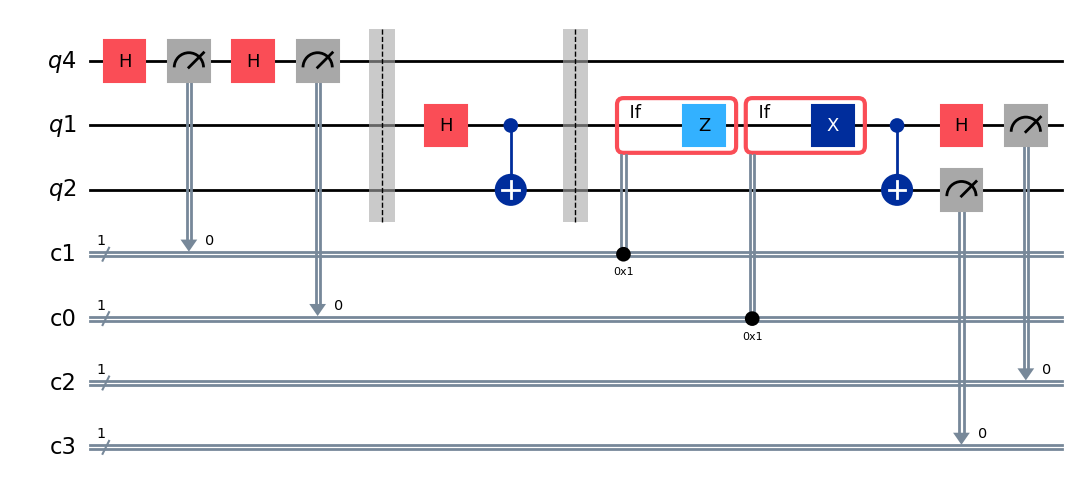

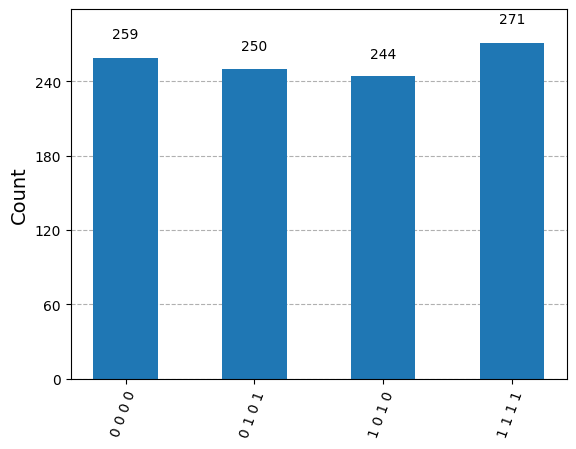

In [5]:
RBG = QuantumRegister(1)

test = QuantumCircuit(RBG, b, a, e_0, e_1, c, d)
test.h(RBG)
test.measure(RBG, b)
test.h(RBG)
test.measure(RBG, a)
test.barrier()

test = test.compose(qc)

display(test.draw('mpl'))

result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

The RBG generated each of the 4 quantum states with a probability close to 25%. And we can observe all 4 standard basis measurements to be symmetric thus verifying the credibility of the Superdense Coding protocol.